#### **Data Verification**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sheets = pd.read_excel("Regional Sales Dataset.xlsx",sheet_name=None)
df_sales= sheets['Sales Orders']
df_customers= sheets['Customers']
df_products= sheets['Products']
df_regions= sheets['Regions']
df_state_reg= sheets['State Regions']
df_budgets= sheets['2017 Budgets']

In [4]:
print("Sales shape",df_sales.shape)
print("Customers shape",df_customers.shape)
print("Products shape",df_products.shape)
print("Regions shape",df_regions.shape)
print("State Regions shape",df_state_reg.shape)
print("Budgets shape",df_budgets.shape)

Sales shape (64104, 12)
Customers shape (175, 2)
Products shape (30, 2)
Regions shape (994, 15)
State Regions shape (49, 3)
Budgets shape (30, 2)


In [5]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [6]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [7]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [8]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [9]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [10]:
new_header= df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:]
df_state_reg.reset_index(drop=True)

df_state_reg.head(5)

,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West
5,CO,Colorado,West


In [11]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


#### **Data Cleaning and Wrangling**

In [12]:
df_sales.head(1)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343


In [13]:
df=df_sales.merge(df_customers,left_on='Customer Name Index',how='left',right_on='Customer Index')
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [14]:
df=df.merge(df_products,left_on='Product Description Index',how='left',right_on='Index')
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [15]:
df=df.merge(df_regions,left_on='Delivery Region Index',how='left',right_on='id')
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [16]:
df=df.merge(df_state_reg[["State Code", "Region"]],left_on='state_code',how='left',right_on='State Code')
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [17]:
df=df.merge(df_budgets,how='left',on='Product Name')
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [18]:
cols_to_drop=['Customer Index', 'Index', 'id', 'State Code']
df=df.drop(columns=cols_to_drop,errors='ignore')

df.head(5)
              

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [19]:
df.columns=df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [20]:
cols_to_keep= [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]

In [21]:
df=df[cols_to_keep]
df.head(5)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [22]:
df= df.rename(columns={
    'ordernumber':'order_number',
    'orderdate':'order_date',
    'customer names':'customer_name',
    'product name':'product_name',
    'order quantity':'order_quantity',
    'unit price':'unit_price',
    'line total':'revenue',
    'total unit cost':'cost',
    'state_code':'state_code',
    'state':'state_name',
    'latitude':'lat',
    'longitude':'lo',
    '2017 budgets':'budget'
})
df.head(1)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state_name,region,lat,lo,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231


In [23]:
df.loc[df['order_date'].dt.year!=2017,'budget']=pd.NA

df[['order_date','product_name','revenue','budget']].head(5)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [24]:
df_2017=df[df['order_date'].dt.year==2017]
df_2017.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state_name,region,lat,lo,budget
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565


In [25]:
df.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state_name,region,lat,lo,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN


In [26]:
df['total_cost']=df['order_quantity'] * df['cost']

In [27]:
df['profit']=df['revenue']-df['total_cost']
df['profit_margin_pct']=df['profit'] / df['revenue']* 100
df.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state_name,region,lat,lo,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


#### **EDA**

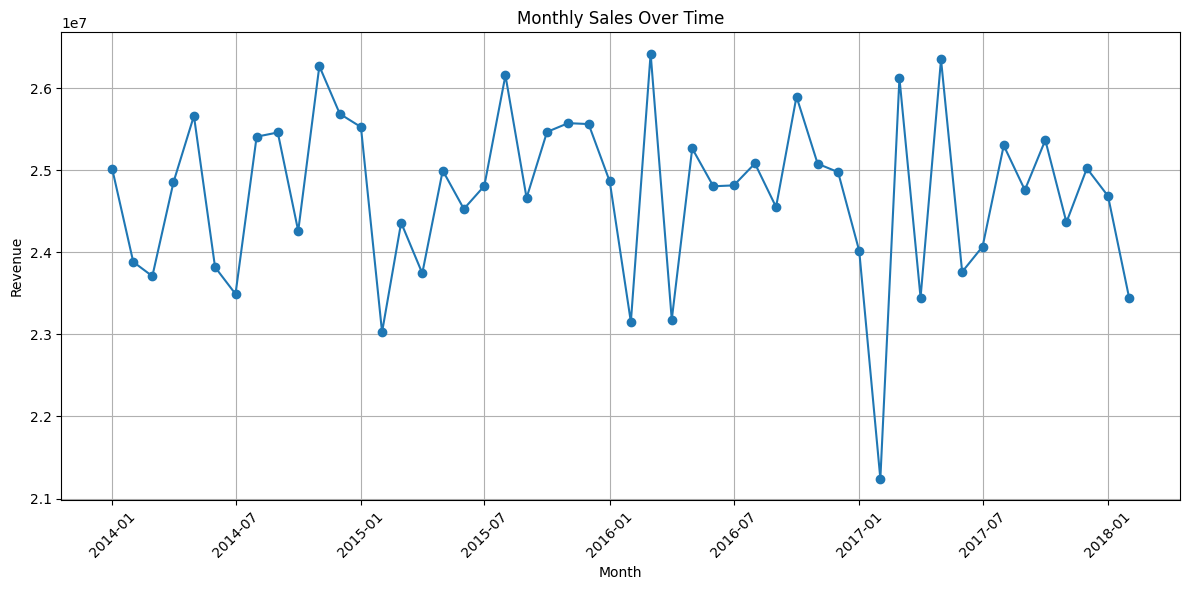

In [29]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('order_month')['revenue'].sum().reset_index()
monthly_sales['order_month'] = monthly_sales['order_month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['order_month'], monthly_sales['revenue'], marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
df_new = df[df['order_date'].dt.year != 2018].copy()

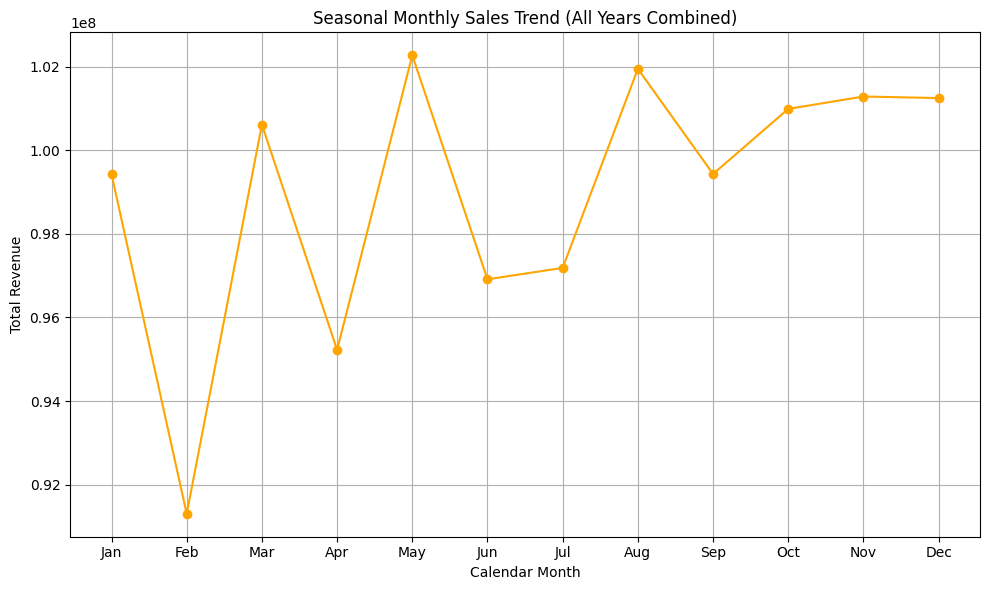

In [33]:
# Step 1: Extract month number and month name
df_new['order_date'] = pd.to_datetime(df_new['order_date'])
df_new['month_num'] = df_new['order_date'].dt.month
df_new['month_name'] = df_new['order_date'].dt.strftime('%b')  # e.g., Jan, Feb

# Step 2: Group by calendar month and sum revenue
monthly_seasonality = df_new.groupby(['month_num', 'month_name'])['revenue'].sum().reset_index()

# Step 3: Sort by month number
monthly_seasonality = monthly_seasonality.sort_values('month_num')

# Step 4: Plot seasonality trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_seasonality['month_name'], monthly_seasonality['revenue'], marker='o', color='orange')
plt.title('Seasonal Monthly Sales Trend (All Years Combined)')
plt.xlabel('Calendar Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

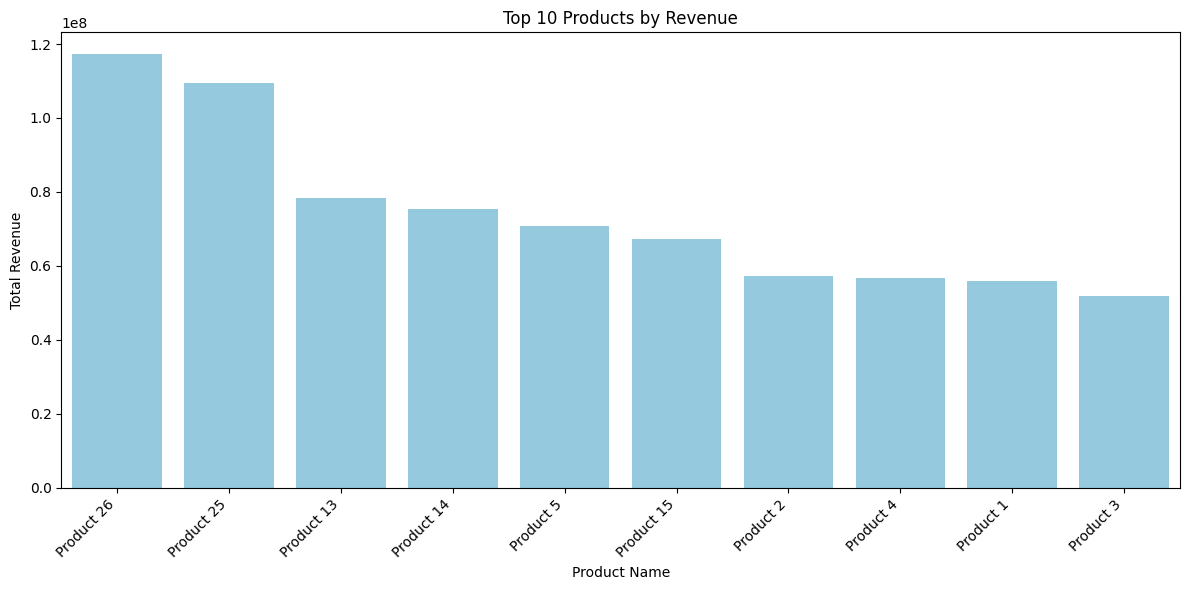

In [30]:
# Ensure 'revenue' is numeric
df_new['revenue'] = pd.to_numeric(df_new['revenue'], errors='coerce')

# Group by product and sum the revenue
top_products = df.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values, color="skyblue")

plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

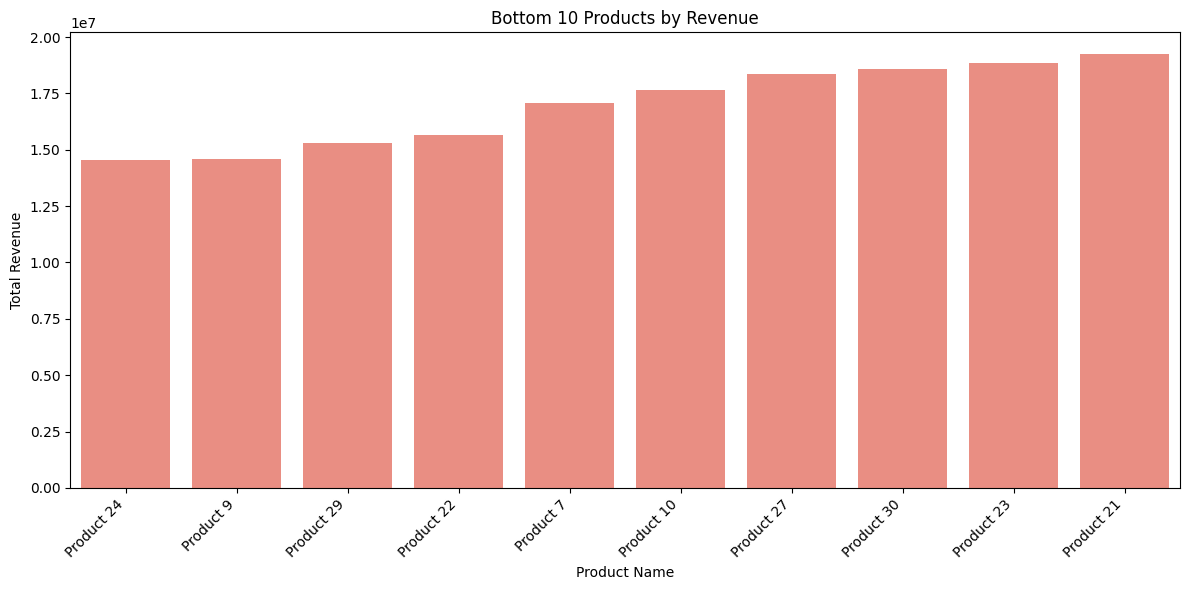

In [31]:
bottom_products = (
    df.groupby("product_name")["revenue"]
    .sum()
    .sort_values()
    .head(10)
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_products.index, y=bottom_products.values, color="salmon")

plt.title("Bottom 10 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

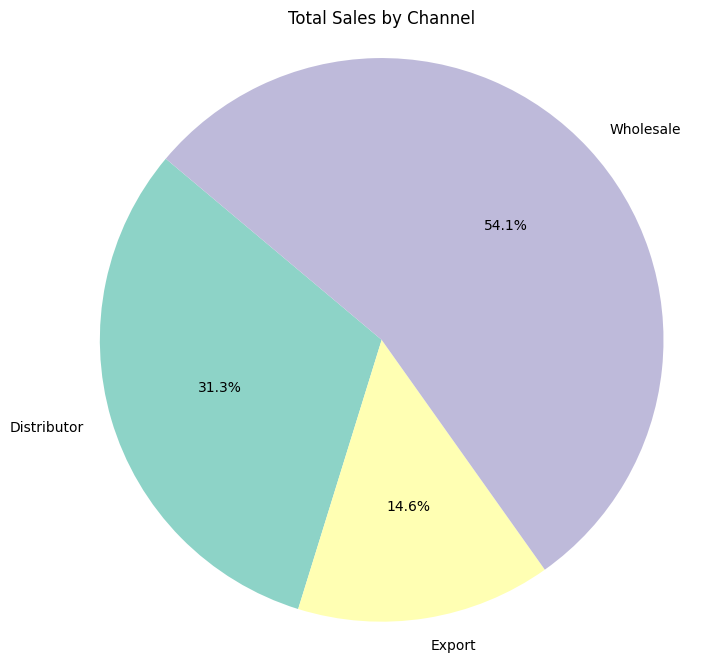

In [32]:
channel_sales = df.groupby("channel")["revenue"].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(channel_sales, labels=channel_sales.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Set3.colors)
plt.title("Total Sales by Channel")
plt.axis("equal")  # Ensures pie is drawn as a circle
plt.show()

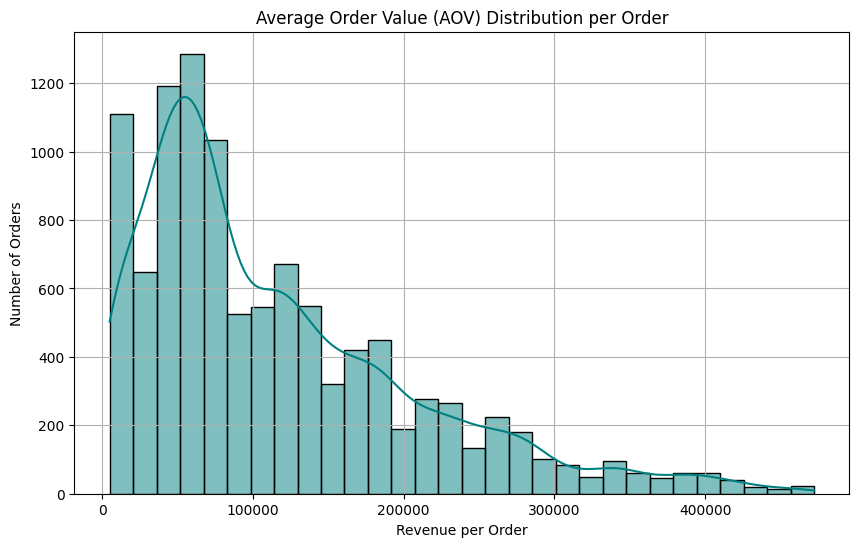

In [33]:
# Step 1: Group by order_number and calculate revenue per order
aov_data = df.groupby("order_number")["revenue"].sum()

# Step 2: Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(aov_data, bins=30, kde=True, color="teal", edgecolor="black")
plt.title("Average Order Value (AOV) Distribution per Order")
plt.xlabel("Revenue per Order")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.show()

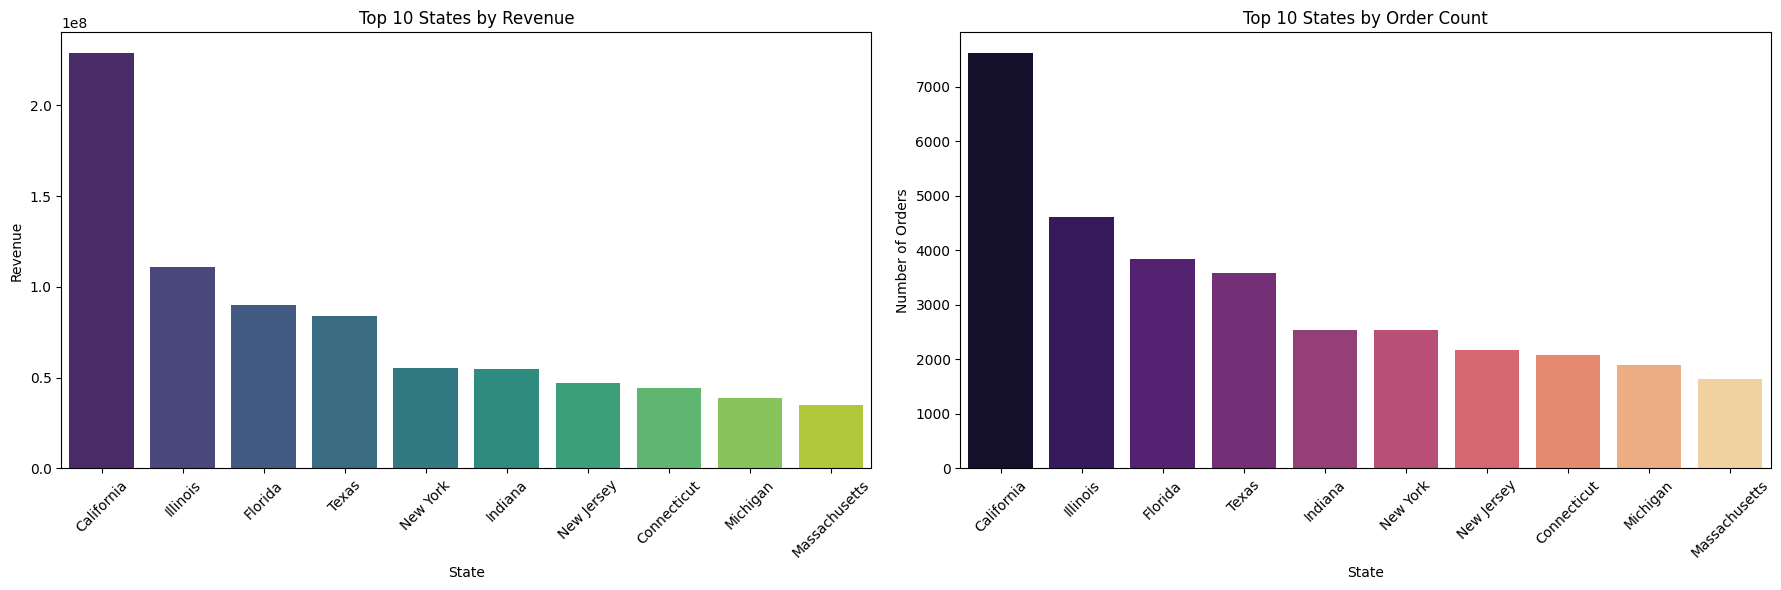

In [38]:
# Group by state and aggregate
state_stats = df.groupby("state_name").agg({
    "revenue": "sum",
    "order_number": "nunique"  # Unique order count
}).reset_index()

# Sort to get top 10
top10_by_revenue = state_stats.sort_values(by="revenue", ascending=False).head(10)
top10_by_orders = state_stats.sort_values(by="order_number", ascending=False).head(10)

# Plotting side-by-side
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Top 10 by Revenue
sns.barplot(
    data=top10_by_revenue,
    x="state_name",
    y="revenue",
    hue="state_name",
    palette="viridis",
    legend=False,
    ax=axs[0]
)
axs[0].set_title("Top 10 States by Revenue")
axs[0].set_xlabel("State")
axs[0].set_ylabel("Revenue")
axs[0].tick_params(axis='x', rotation=45)

# Top 10 by Order Count
sns.barplot(
    data=top10_by_orders,
    x="state_name",
    y="order_number",
    hue="state_name",
    palette="magma",
    legend=False,
    ax=axs[1]
)
axs[1].set_title("Top 10 States by Order Count")
axs[1].set_xlabel("State")
axs[1].set_ylabel("Number of Orders")
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


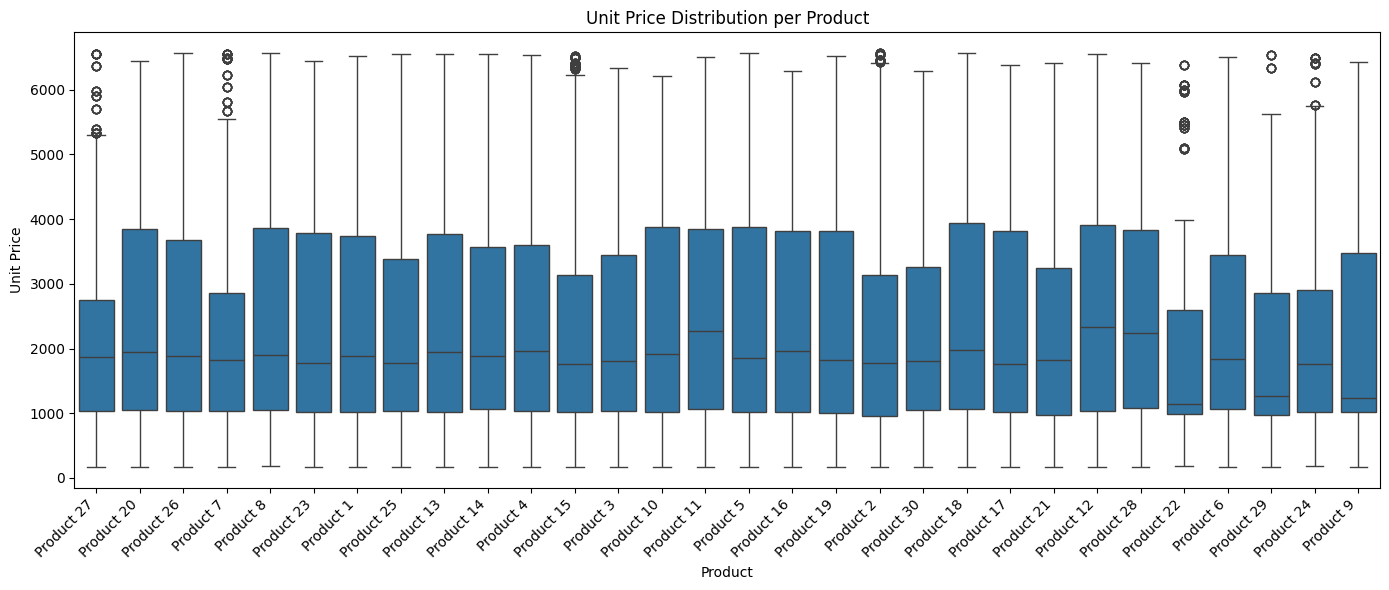

In [36]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='product_name', y='unit_price')
plt.xticks(rotation=45, ha='right')
plt.title('Unit Price Distribution per Product')
plt.xlabel('Product')
plt.ylabel('Unit Price')
plt.tight_layout()
plt.show()

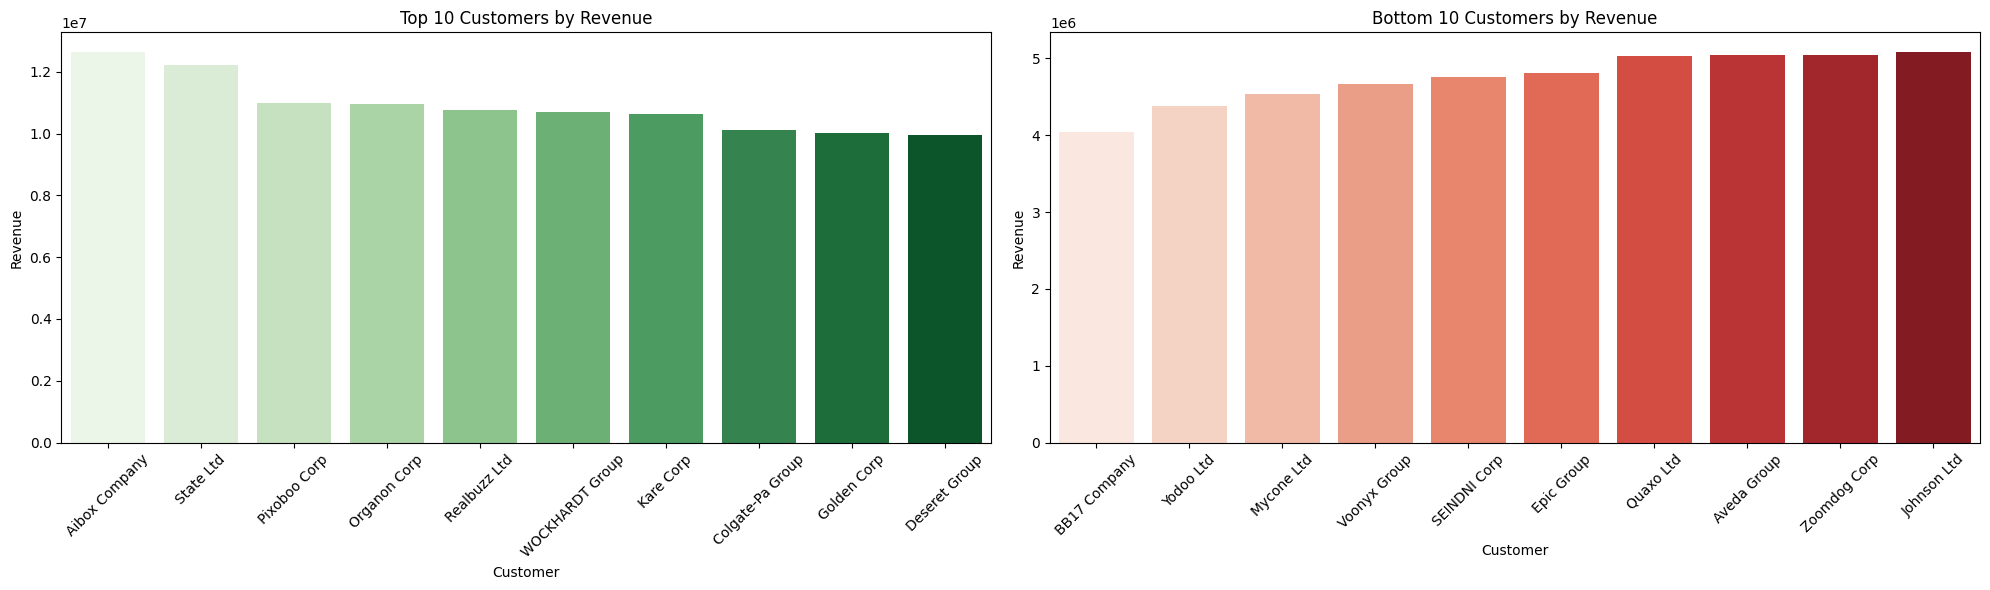

In [40]:
# Group by customer and calculate total revenue
customer_revenue = df.groupby("customer_name")["revenue"].sum().reset_index()

# Sort to get top and bottom 10
top10_customers = customer_revenue.sort_values(by="revenue", ascending=False).head(10)
bottom10_customers = customer_revenue.sort_values(by="revenue", ascending=True).head(10)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Top 10 Customers - Vertical Bars
sns.barplot(
    data=top10_customers,
    x="customer_name",
    y="revenue",
    hue="customer_name",
    palette="Greens",
    legend=False,
    ax=axs[0]
)
axs[0].set_title("Top 10 Customers by Revenue")
axs[0].set_xlabel("Customer")
axs[0].set_ylabel("Revenue")
axs[0].tick_params(axis='x', rotation=45)  # Rotate x labels for readability

# Bottom 10 Customers - Vertical Bars
sns.barplot(
    data=bottom10_customers,
    x="customer_name",
    y="revenue",
    hue="customer_name",
    palette="Reds",
    legend=False,
    ax=axs[1]
)
axs[1].set_title("Bottom 10 Customers by Revenue")
axs[1].set_xlabel("Customer")
axs[1].set_ylabel("Revenue")
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


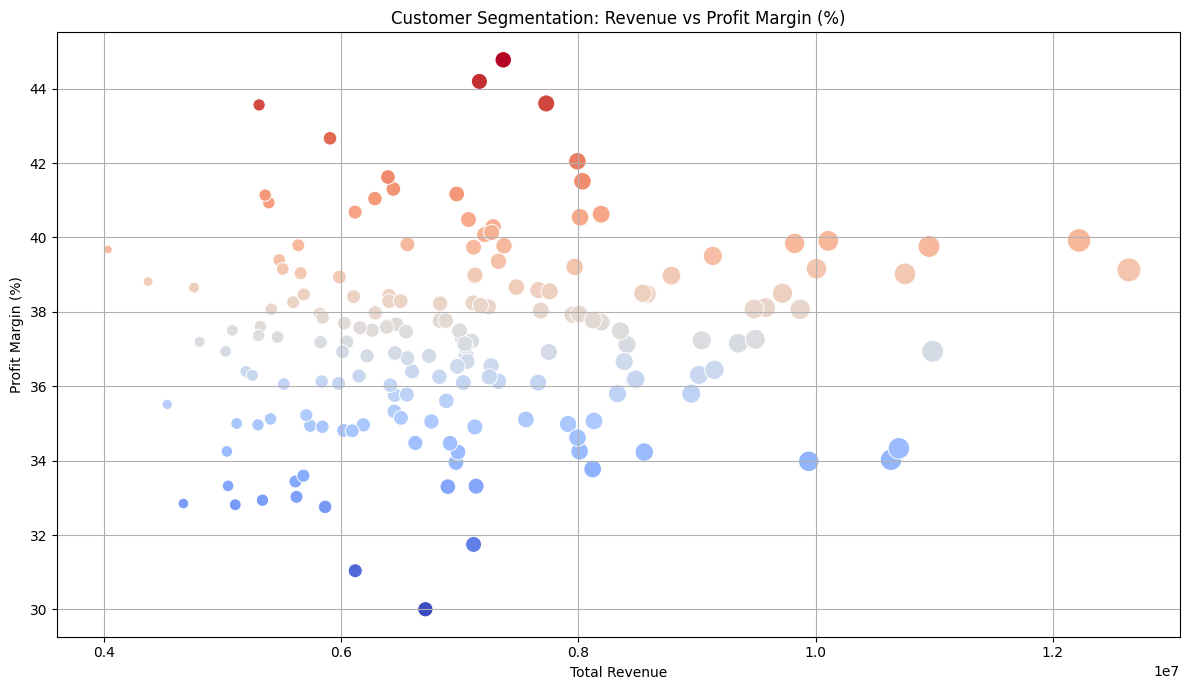

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Aggregate per customer
customer_segmentation = df.groupby("customer_name").agg({
    "revenue": "sum",
    "profit": "sum"
}).reset_index()

# Step 2: Calculate profit margin %
customer_segmentation["profit_margin_pct"] = (
    customer_segmentation["profit"] / customer_segmentation["revenue"]
) * 100

# Step 3: Plot
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=customer_segmentation,
    x="revenue",
    y="profit_margin_pct",
    hue="profit_margin_pct",
    palette="coolwarm",
    size="revenue",
    sizes=(40, 300),
    legend=False
)

plt.title("Customer Segmentation: Revenue vs Profit Margin (%)")
plt.xlabel("Total Revenue")
plt.ylabel("Profit Margin (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


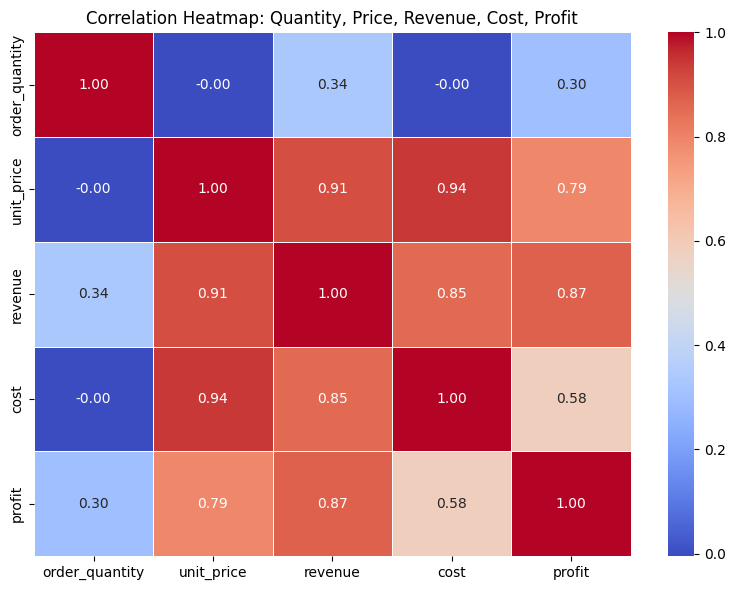

In [42]:
# Select relevant columns
corr_df = df[["order_quantity", "unit_price", "revenue", "cost", "profit"]]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    fmt=".2f"
)

plt.title("Correlation Heatmap: Quantity, Price, Revenue, Cost, Profit")
plt.tight_layout()
plt.show()

In [33]:
state_to_region = {
    'California': 'West',
    'Oregon': 'West',
    'Washington': 'West',
    'Nevada': 'West',
    'Arizona': 'West',
    'Utah': 'West',
    'Colorado': 'West',
    'New Mexico': 'West',
    'Montana': 'West',
    'Idaho': 'West',
    'Wyoming': 'West',
    'Alaska': 'West',
    'Hawaii': 'West',
    
    'North Dakota': 'Midwest',
    'South Dakota': 'Midwest',
    'Nebraska': 'Midwest',
    'Kansas': 'Midwest',
    'Minnesota': 'Midwest',
    'Iowa': 'Midwest',
    'Missouri': 'Midwest',
    'Wisconsin': 'Midwest',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Ohio': 'Midwest',
    'Michigan': 'Midwest',
    
    'New York': 'Northeast',
    'New Jersey': 'Northeast',
    'Massachusetts': 'Northeast',
    'Connecticut': 'Northeast',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'New Hampshire': 'Northeast',
    'Vermont': 'Northeast',
    'Maine': 'Northeast',
    
    'Texas': 'South',
    'Oklahoma': 'South',
    'Arkansas': 'South',
    'Louisiana': 'South',
    'Alabama': 'South',
    'Georgia': 'South',
    'Florida': 'South',
    'South Carolina': 'South',
    'North Carolina': 'South',
    'Tennessee': 'South',
    'Kentucky': 'South',
    'Virginia': 'South',
    'West Virginia': 'South',
    'Maryland': 'South',
    'Delaware': 'South',
    'Mississippi': 'South',
    'District of Columbia': 'South',
}

df["us_region"] = df["state_name"].map(state_to_region)

df.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state_name,region,lat,lo,budget,total_cost,profit,profit_margin_pct,us_region
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,South
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,Midwest
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,West
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,Midwest
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,Northeast


In [34]:
df.to_csv('Sales_data(EDA Exported).csv', index=False)